<a href="https://colab.research.google.com/github/Frandiiile/Quants/blob/main/Simulation_Brownian_Motion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brownian Motion
Geometric Brownian motion (GBM) S is defined by S0 > 0 and the dynamics as defined in the following Stochastic Differential Equation (SDE):

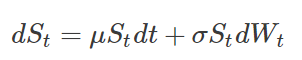

Integrated Form:

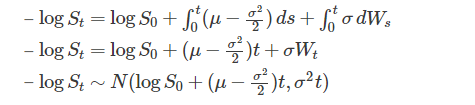


Explicit Expression:

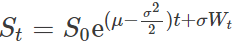



In [1]:
# Importing Dependecies
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Initializing Parametres
# drift coefficent
mu = 0.075
# number of steps
n = 250
# time in years
T = 1
# number of sims
M = 10000
# initial stock price
S0 = 75
# volatility
sigma = 0.33

# Simulating GBM Paths

We'll simulate the stock price directly throughout the simulation and multiple the exponential terms together at each time step

In [4]:
# calc each time step
dt = T/n
# simulation using numpy arrays
St = np.exp(
    (mu - sigma ** 2 / 2) * dt
    + sigma * np.random.normal(0, np.sqrt(dt), size=(M,n)).T
)
# include array of 1's
St = np.vstack([np.ones(M), St])
# multiply through by S0 and return the cumulative product of elements along a given simulation path (axis=0).
St = S0 * St.cumprod(axis=0)

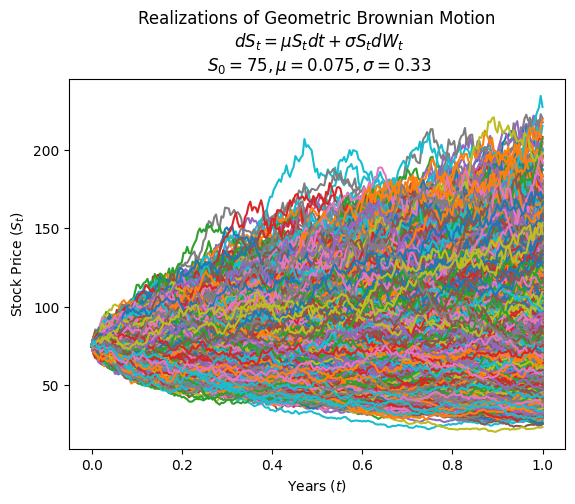

In [5]:
# plotting results
# Define time interval correctly
time = np.linspace(0,T,n+1)
# Require numpy array that is the same shape as St
tt = np.full(shape=(M,n+1), fill_value=time).T
plt.plot(tt, St)
plt.xlabel("Years $(t)$")
plt.ylabel("Stock Price $(S_t)$")
plt.title(
    "Realizations of Geometric Brownian Motion\n $dS_t = \mu S_t dt + \sigma S_t dW_t$\n $S_0 = {0}, \mu = {1}, \sigma = {2}$".format(S0, mu, sigma)
)
plt.show()